In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
import os, re

### Poll data

In [2]:
#pool_data = pd.read_csv('dane_years/pools_edited.csv', index_col=0)
pool_data_middle = pd.read_csv('dane_years/pools_data/percent_votes.csv', index_col=0).iloc[:,:-1]
pool_data_middle = pool_data_middle.divide(pool_data_middle.sum(1),0)

### Voting data

In [3]:
path = 'wyniki_wyborow/Simple/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()

In [4]:
files

['2001_WS.csv',
 '2005_WS.csv',
 '2007_WS.csv',
 '2011_WS.csv',
 '2015_WS.csv',
 '2019_WS.csv']

In [5]:
vote_list = [(lambda x: pd.read_csv(path+x,index_col=0, header=0))(f) for f in files[:]]
vote_list[0] = vote_list[0].iloc[1:,:]

In [6]:
vote_list[0]['jednostka'] = [j.upper() for j in vote_list[0]['jednostka']]
vote_list[0] = vote_list[0].sort_values(['jednostka'])
vote_list[0].columns = ['województwo'] + vote_list[0].columns.values.tolist()[1:] 

In [7]:
vote_list[0] = vote_list[0].set_index('województwo')

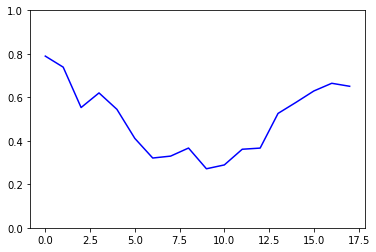

In [8]:
plt.plot(pool_data_middle['Blue'].values[1:],'b')
plt.ylim(0,1)
plt.show()

In [9]:
w = pd.read_csv('dane_years/voters/percent_voters.csv', header=None)[1].values
w.shape

(16,)

In [10]:
pool_data = pool_data_middle.copy()

In [11]:
for vl, i in zip(vote_list.copy(),[0,4,6,10,14,18]):    
    pool_data.iloc[i] = np.average(vl.iloc[:,:-1].div(vl.iloc[:,:-1].sum(1),0), 0, w)

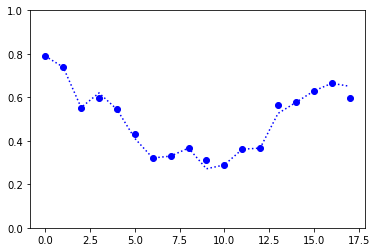

In [12]:
plt.plot(pool_data_middle['Blue'].values[1:],'b:')
plt.plot(pool_data['Blue'].values[1:],'bo')
plt.ylim(0,1)
plt.show()

### Computation files

In [19]:
files = [f for f in listdir('model/model1') if re.match(r'.*III\..*', f)]
files.sort()
files

['all_at_once_III.txt',
 'each_year_no_time_III.txt',
 'output_input_each_epoch_III.txt',
 'output_input_each_epoch_lin_w_III.txt',
 'output_input_each_step_III.txt',
 'output_input_each_step_lin_w_III.txt']

In [20]:
files1 = [f for f in listdir('model/model1') if re.match(r'.*III_.*', f)]
files1

['output_input_each_step_lin_w_III_old.txt']

In [21]:
out_arr = np.zeros((6,100, 1001, 18))
for i in range(0,len(files)):
    print(files[i])
    output = []
    with open('model/model1/'+files[i], "r") as f:
        for fline in f.read().split('\n')[:-1]:
            fline = fline[3:].replace('[','').split(']')
            tmp_output = []
            for fl in fline:
                if(len(fl)>1):
                    tmptmp_out = []
                    for fi in fl.split(' '):
                        if(len(fi)>1): 
                            try:
                                tmptmp_out.append(float(fi))
                            except: print(fi)
                    tmp_output.append(tmptmp_out)
            output.append(tmp_output)
        np.array(output)
    out_arr[i]= np.array(output)

all_at_once_III.txt
each_year_no_time_III.txt
output_input_each_epoch_III.txt
output_input_each_epoch_lin_w_III.txt
output_input_each_step_III.txt
output_input_each_step_lin_w_III.txt


In [23]:
out_arr2 = np.zeros((6,100, 1001, 18))
for i in range(0,len(files1)):
    print(files1[i])
    output = []
    with open('model/model1/'+files1[i], "r") as f:
        for fline in f.read().split('\n')[:-1]:
            fline = fline[3:].replace('[','').split(']')
            tmp_output = []
            for fl in fline:
                if(len(fl)>1):
                    tmptmp_out = []
                    for fi in fl.split(' '):
                        if(len(fi)>1): 
                            try:
                                tmptmp_out.append(float(fi))
                            except: print(fi)
                    tmp_output.append(tmptmp_out)
            output.append(tmp_output)
        np.array(output)
    out_arr2[i]= np.array(output)

output_input_each_step_lin_w_III_old.txt


In [24]:
out_arr.shape

(6, 100, 1001, 18)

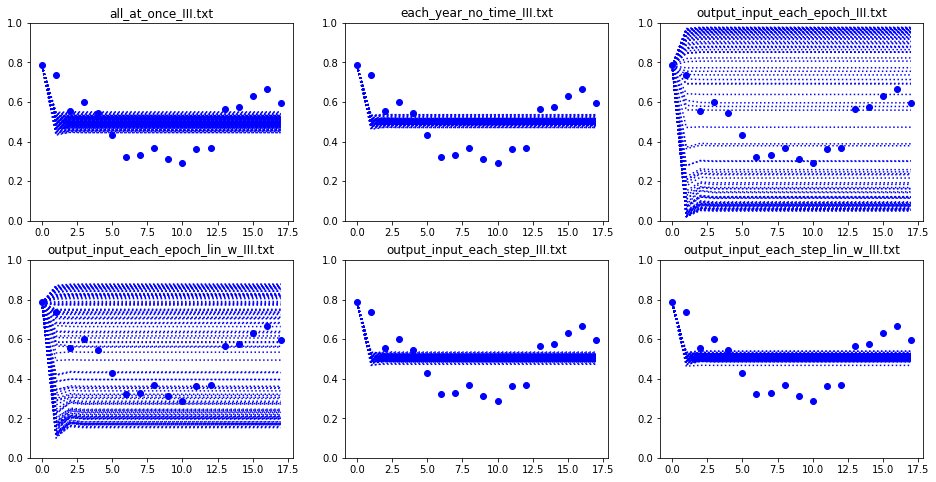

In [25]:
fig = plt.figure(figsize=(16,8))
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    plt_arr = out_arr[i,:,0,:]
    plt_arr = plt_arr[plt_arr>0].reshape(-1,18)
    ax.plot(plt_arr.T, 'b:')
    ax.plot(pool_data['Blue'].values[1:],'bo')
    ax.set_title(files[i])
    ax.set_ylim(0,1)
    
plt.show()

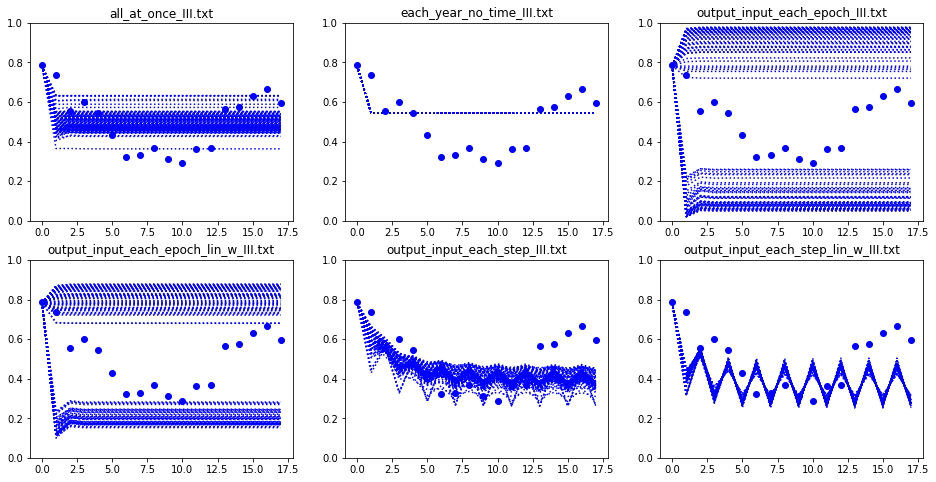

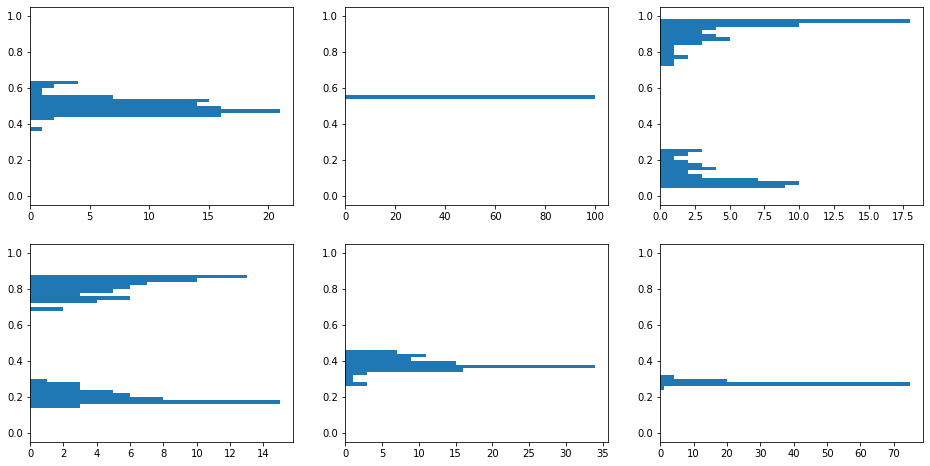

In [30]:
fig = plt.figure(figsize=(16,8))
fig2 = plt.figure(figsize=(16,8))
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    ax2 = fig2.add_subplot(2,3,i+1)
    plt_arr = out_arr[i,:,-1,:]
    plt_arr = plt_arr[plt_arr>0].reshape(-1,18)
    ax.plot(plt_arr.T, 'b:')
    ax.plot(pool_data['Blue'].values[1:],'bo')
    ax.set_title(files[i])
    ax.set_ylim(0,1)
    
    ax2.hist(out_arr[i,:,-1,-1],orientation=u'horizontal', range=(0,1), bins=50)
plt.show()

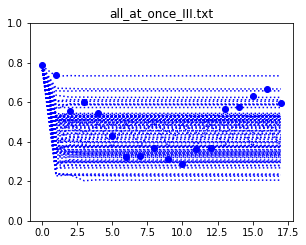

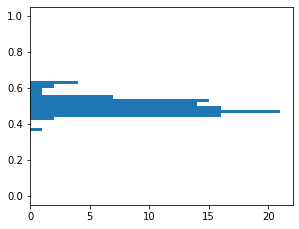

In [31]:
fig = plt.figure(figsize=(16,8))
fig2 = plt.figure(figsize=(16,8))
for i in range(1):
    ax = fig.add_subplot(2,3,i+1)
    ax2 = fig2.add_subplot(2,3,i+1)
    plt_arr = out_arr2[i,:,-1,:]
    plt_arr = plt_arr[plt_arr>0].reshape(-1,18)
    ax.plot(plt_arr.T, 'b:')
    ax.plot(pool_data['Blue'].values[1:],'bo')
    ax.set_title(files[i])
    ax.set_ylim(0,1)
    
    ax2.hist(out_arr[i,:,-1,-1],orientation=u'horizontal', range=(0,1), bins=50)
plt.show()